In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

#Text Preprocessing
import re
import string
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

#Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



import pandas as pd
import operator
import re
from matplotlib import pyplot as plt

import nltk
from nltk.corpus import stopwords

import collections
from collections import OrderedDict
from collections import Counter

from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier
from textblob.classifiers import DecisionTreeClassifier


In [78]:
df = pd.read_csv('/content/Ulta Skincare Reviews.csv')


df.head(15)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
5,Seriously nice scrub!,"Love that you can use it wet and dry, you can ...",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
6,Absolutely love,Absolutely love,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
7,I truly like the multivitamin,I truly like the multivitamin thermafoliant pr...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
8,Favorite,Definitely love it! My skin face feels better ...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
9,Excelent,Excelent,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [79]:
df.isna().sum()

,0
Review_Title,0
Review_Text,3
Verified_Buyer,0
Review_Date,0
Review_Location,1
Review_Upvotes,0
Review_Downvotes,0
Product,0
Brand,0
Scrape_Date,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4147 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4149 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB


In [81]:
df.drop(['Verified_Buyer', 'Review_Date', 'Scrape_Date', 'Brand'
     ], axis=1, inplace=True)

In [82]:
df.head()

,Review_Title,Review_Text,Review_Location,Review_Upvotes,Review_Downvotes,Product
0,Perfect,Love using this on my face while in the shower...,Undisclosed,0,0,Multi-Vitamin Thermafoliant
1,You need this,Even better than the daily microfoliant. I'm o...,Undisclosed,0,0,Multi-Vitamin Thermafoliant
2,Clean skin,Enjoy this product so much ! I look forward to...,Undisclosed,0,0,Multi-Vitamin Thermafoliant
3,Love This Stuff!,I've never tried anything like this before and...,Undisclosed,0,0,Multi-Vitamin Thermafoliant
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,Undisclosed,0,0,Multi-Vitamin Thermafoliant


In [83]:
df.isnull().sum()

,0
Review_Title,0
Review_Text,3
Review_Location,1
Review_Upvotes,0
Review_Downvotes,0
Product,0


In [84]:
df.dropna(axis=0, inplace=True)

In [85]:
df.duplicated().sum()

459

In [86]:
df.drop_duplicates(keep='first', inplace=True)

In [87]:
df.shape

(3687, 6)

In [88]:
nltk.download('punkt_tab')



df['Review_Text'] = df['Review_Text'].astype(str)
df['Review_Text'] = df['Review_Text'].apply(lambda x: x.lower())
df['Review_Text'] = df['Review_Text'].apply(lambda x: re.sub('[^a-zA-Z0-9]',' ',x))
df['Review_Text'] = df['Review_Text'].apply(lambda x: word_tokenize(x))
df['Review_Text']

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Review_Text
0,"[love, using, this, on, my, face, while, in, t..."
1,"[even, better, than, the, daily, microfoliant,..."
2,"[enjoy, this, product, so, much, i, look, forw..."
3,"[i, ve, never, tried, anything, like, this, be..."
4,"[this, exfoliates, very, nicely, and, gives, a..."
...,...
4145,"[much, better, product, than, a, scrub]"
4146,"[i, ve, been, using, this, exfoliant, for, a, ..."
4147,"[my, skin, looks, better, now, than, 10, years..."
4148,"[this, product, was, useless, for, me, i, shou..."


In [90]:

import nltk
nltk.download('stopwords')




df['Review_Text'] = df['Review_Text'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])
df['Review_Text']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review_Text
0,"[love, using, face, shower, heats, gives, ligh..."
1,"[even, better, daily, microfoliant, obsessed, ..."
2,"[enjoy, product, much, look, forward, using, r..."
3,"[never, tried, anything, like, love, apply, fa..."
4,"[exfoliates, nicely, gives, smooth, skin, irri..."
...,...
4145,"[much, better, product, scrub]"
4146,"[using, exfoliant, months, depending, conditio..."
4147,"[skin, looks, better, 10, years, ago]"
4148,"[product, useless, known, exfoliant, use, dail..."


In [91]:
# Install VADER Sentiment package
!pip install vaderSentiment

# Import necessary libraries
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon (required for SentimentIntensityAnalyzer)
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Ensure the 'Review_Text' column exists and is in string format
df['Review_Text'] = df['Review_Text'].astype(str)

# Calculate sentiment scores and store the 'compound' score in a new column
df['score'] = df['Review_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Display the DataFrame with scores
df


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Review_Title,Review_Text,Review_Location,Review_Upvotes,Review_Downvotes,Product,score
0,Perfect,"['love', 'using', 'face', 'shower', 'heats', '...",Undisclosed,0,0,Multi-Vitamin Thermafoliant,0.7964
1,You need this,"['even', 'better', 'daily', 'microfoliant', 'o...",Undisclosed,0,0,Multi-Vitamin Thermafoliant,0.2960
2,Clean skin,"['enjoy', 'product', 'much', 'look', 'forward'...",Undisclosed,0,0,Multi-Vitamin Thermafoliant,0.8214
3,Love This Stuff!,"['never', 'tried', 'anything', 'like', 'love',...",Undisclosed,0,0,Multi-Vitamin Thermafoliant,0.8810
4,This exfoliates very nicely and,"['exfoliates', 'nicely', 'gives', 'smooth', 's...",Undisclosed,0,0,Multi-Vitamin Thermafoliant,0.1761
...,...,...,...,...,...,...,...
4145,I would buy this product again,"['much', 'better', 'product', 'scrub']","vernon hills, il",0,1,Daily Microfoliant,0.4404
4146,Gentle exfoliant- leaves skin smooth & soft,"['using', 'exfoliant', 'months', 'depending', ...","Humboldt, CA",1,0,Daily Microfoliant,0.6933
4147,One of my favorite skincare products of all time.,"['skin', 'looks', 'better', '10', 'years', 'ago']","Albuquerque, NM",2,1,Daily Microfoliant,0.4404
4148,Ehhh...,"['product', 'useless', 'known', 'exfoliant', '...",Fayetteville,1,1,Daily Microfoliant,0.7003


In [93]:
df['score']


,score
0,0.7964
1,0.2960
2,0.8214
3,0.8810
4,0.1761
...,...
4145,0.4404
4146,0.6933
4147,0.4404
4148,0.7003


In [94]:
# Assign sentiment labels based on new thresholds
df['sentiment'] = df['score'].apply(
    lambda x: 1 if x > 0.4 else 0
)


In [95]:
df['sentiment'].value_counts()

,count
sentiment,
1,3064
0,623


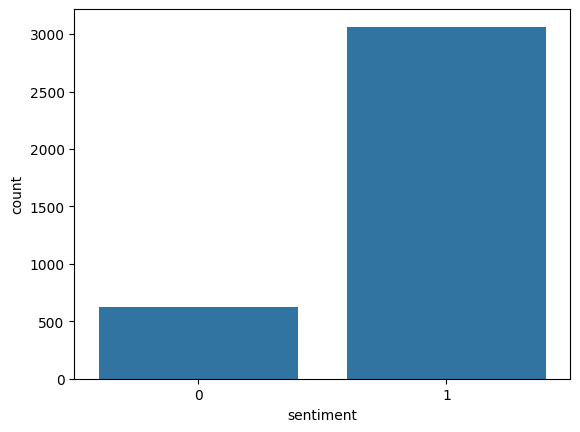

In [96]:
sns.countplot(x=df['sentiment'])
plt.show()

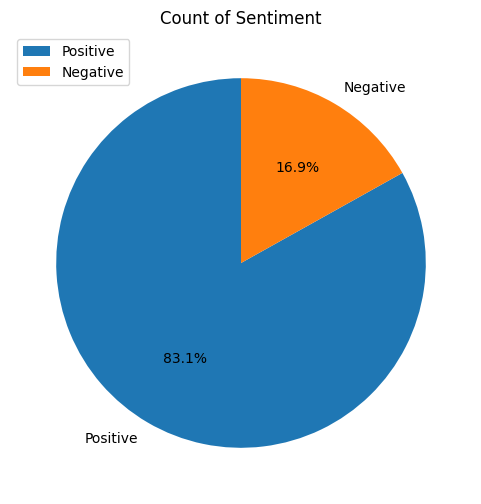

In [98]:
import matplotlib.pyplot as plt

# Get the unique sentiment scores and their counts
score_counts = df['sentiment'].value_counts()

# Create labels for each unique score
labels = score_counts.index.tolist()

# Create a pie chart
score_counts.plot.pie(
    figsize=(6, 6),
    title='Count of Sentiment',
    labels=['Positive', 'Negative'], # Use the generated labels
    autopct='%1.1f%%',
    startangle=90
)

# Add legend
plt.legend(['Positive', 'Negative'], loc='upper left')

plt.ylabel('')
plt.show()

In [99]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

import nltk
nltk.download('punkt_tab')
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [100]:

def clean_text(text):
    stop = stopwords.words('english')
    punc = list(punctuation)
    bad_tokens = stop + punc
    lemma = WordNetLemmatizer()
    tokens = word_tokenize(text)
    word_tokens = [t for t in tokens if t.isalpha()]
    clean_token = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
    return " ".join(clean_token)

In [101]:
df['Review_Text'].apply(clean_text)

,Review_Text
0,
1,
2,
3,
4,
...,...
4145,
4146,
4147,
4148,


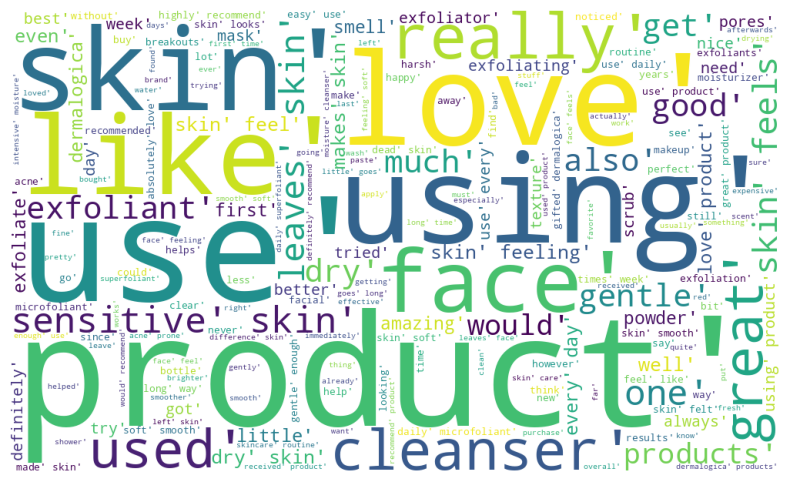

In [102]:
allwords = ' '.join(word for word in df['Review_Text'])
wordcloud = WordCloud(
    width = 1000,
    height = 600,
    background_color = 'white').generate(allwords)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##Feature exraction

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['Review_Text'])


In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'df['Review_Text']' contains lists of tokens, join them back into strings
#df['Review_Text'] = df['Review_Text'].apply(lambda tokens: ' '.join(tokens))

#cv = CountVectorizer()
#x = cv.fit_transform(df['Review_Text'])

##Logistic regresion with class weight balanced

In [104]:
X=x.toarray()
y=df['sentiment']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [105]:
model = LogisticRegression( class_weight='balanced')
# Use x_train instead of X_train
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [106]:
y_pred = model.predict(x_test)

In [107]:
def evaluation_parametrics(name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    t1 = ConfusionMatrixDisplay(cm)
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    t1.plot()

##Confusion metrix

Classification Report
              precision    recall  f1-score   support

           0       0.60      0.79      0.68       206
           1       0.95      0.88      0.91       901

    accuracy                           0.86      1107
   macro avg       0.77      0.84      0.80      1107
weighted avg       0.88      0.86      0.87      1107



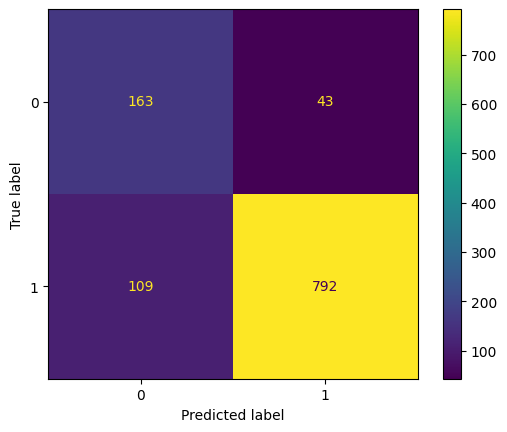

In [108]:
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[163  43]
 [109 792]]


#**Smote ,Naive bayes**

In [110]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

In [118]:
clf=MultinomialNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [119]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy score is ',accuracy)

cr=classification_report(y_test,y_pred)
print(cr)

Accuracy score is  0.8139114724480578
              precision    recall  f1-score   support

           0       0.50      0.00      0.01       206
           1       0.81      1.00      0.90       901

    accuracy                           0.81      1107
   macro avg       0.66      0.50      0.45      1107
weighted avg       0.76      0.81      0.73      1107



#Confusion Metrix for NB

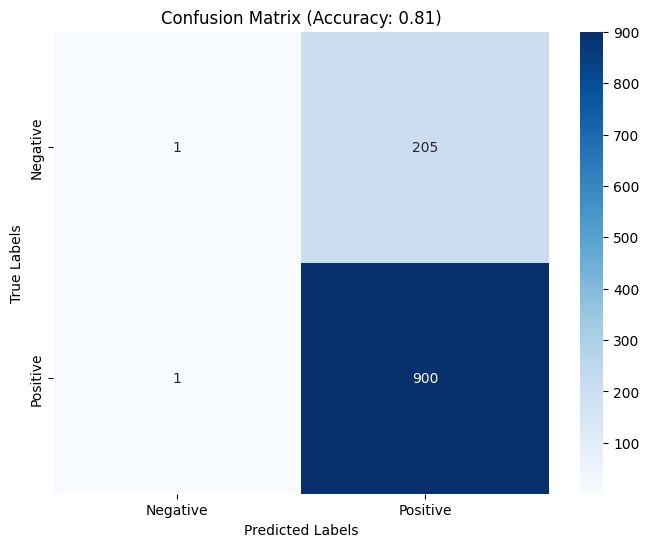

In [120]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[  1 205]
 [  1 900]]


##Random Forest model with class weight Balanced

In [122]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
# Change X_train_sm to x_train_sm
rf.fit(x_train_sm, y_train_sm)

# Predictions
# Change X_test to x_test, assuming x_test is defined in your environment
y_pred = rf.predict(x_test)

# Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8717253839205059
              precision    recall  f1-score   support

           0       0.76      0.45      0.57       206
           1       0.89      0.97      0.92       901

    accuracy                           0.87      1107
   macro avg       0.82      0.71      0.75      1107
weighted avg       0.86      0.87      0.86      1107



##Confusion metrix

In [123]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 93 113]
 [ 29 872]]


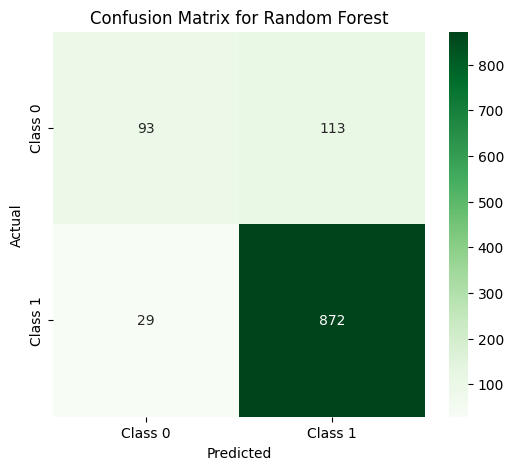

In [128]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()

##Creating grid point

##

```
# This is formatted as code
```

SVM Decision Boundary

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

In [67]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [68]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Apply PCA only on the training data
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)  # Transform only the training data

# Initialize SVM with balanced class weights
model = SVC(kernel='linear', C=1, class_weight='balanced')

# Train the model using the transformed training data and corresponding labels
model.fit(X_train_2d, y_train)

# Now, transform the test data using the same PCA object
X_test_2d = pca.transform(X_test)

# Make predictions on the transformed test data
y_pred = model.predict(X_test_2d)

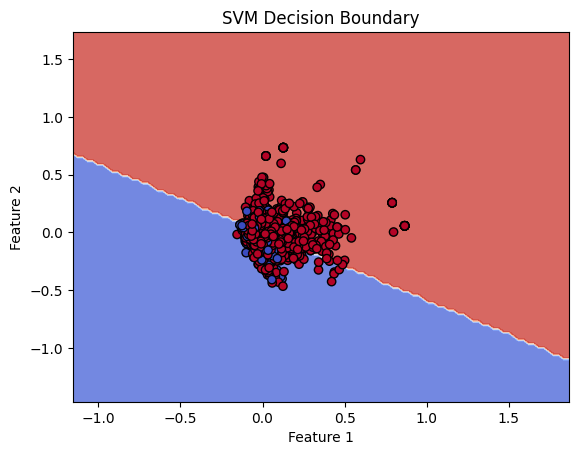

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of points
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict on the grid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

# Title and labels
plt.title("SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Show the plot
plt.show()


##SVC Model with class weight Balanced and adjusted Threshold

In [70]:
!pip install scikit-learn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Apply SMOTE for handling class imbalance
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Initialize SVM with balanced class weights
svm = SVC(random_state=42, class_weight='balanced', probability=True)  # Set probability=True for decision_function
svm.fit(X_train_sm, y_train_sm)

# Get decision function scores (distance to the hyperplane)
y_scores = svm.decision_function(X_test)

# Define a threshold to classify the predictions
threshold = 0.4  # Adjust this threshold to fine-tune performance
y_pred_adjusted = (y_scores > threshold).astype(int)

# Results
print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))


Accuracy: 0.8915989159891599
              precision    recall  f1-score   support

           0       0.75      0.63      0.68       206
           1       0.92      0.95      0.93       901

    accuracy                           0.89      1107
   macro avg       0.83      0.79      0.81      1107
weighted avg       0.89      0.89      0.89      1107



##Confusion metrix

we have better result than before after the class weight is balnced , i have also adjusted the threshhold which gave quite better results than the original svm for class 0

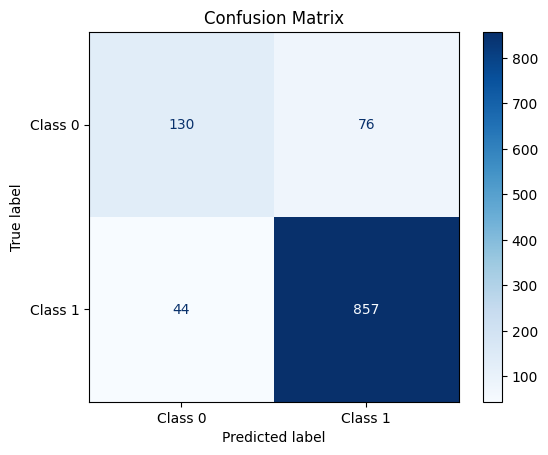

In [129]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_adjusted)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

we have 129 true negatives pridicted correct , we also have 53 FNs or false negatives so the model seems to have worked on negative class alot better now , we have a pricition of 68% which is not high but its fairly ok